In [2]:
"""Results (100k,500k,1M,10M)
PointGoal1: Rewards
PPO-Lagrange 0,5336455656150498 2,668526329300583  6,529639679170881 12,41765097445725
TRPO-Lagrange 2,38398003623805 6,122558633103186  9,407788493971768 17,146432761106485
PointGoal1: Costs

PPO-Lagrange: 32,517591154162474 26,974321484053732  21,432270248865336 17,16141216607268
TRPO-Lagrange: 32,517591154162474 28,651618995400412  21,432270248865336 25,806451612903246

"""

def conf_intervals(x,n_train,epochs):
    means = []
    lows = []
    highs = []
    for i in range(len(x)//n_train):
        means.append(np.mean(x[i*n_train:(i+1)*n_train]))
        lows.append(means[i]-1.645*np.std(x[i*n_train:(i+1)*n_train])/np.sqrt(n_train))
        highs.append(means[i]+1.645*np.std(x[i*n_train:(i+1)*n_train])/np.sqrt(n_train))
    while len(means)<epochs:
        means.append(np.nan)
        lows.append(np.nan)
        highs.append(np.nan)
    return np.array(means), np.array(lows), np.array(highs)



import numpy as np
import pickle
from matplotlib import pyplot as plt
import matplotlib
def plot(files,legend=[],loc_legend="lower left",epochs=10,fig_legend=2,stretch=1,figsize=(10,3),fontsize=10):
    
    matplotlib.rcParams.update({'font.size': fontsize})
    colors = ["orange","blue","red","green","purple"]
    f, (ax1, ax2) = plt.subplots(1, 2,figsize=figsize)
    for color,file in zip(colors[:len(files)],files): 
        with open("results/"+file+"costs.pkl", "rb") as input_file:
            costs = pickle.load(input_file)
        with open("results/"+file+"rews.pkl", "rb") as input_file:
            rewards = pickle.load(input_file)
        assert file[:3] in ["ppo","sac","td3"]

        r_train = []
        r_test = []
        c_train = []
        c_test = []
        
        n_train = 25
        if file[:3]=="sac" or file[:3]=="td3":
            n_test = 25
            if len(rewards) == 500:
                n_test = 25
            elif len(rewards) == 350:
                n_test = 10
            elif len(rewards) == 510:
                n_test = 26

        else:
            n_train = 25
            n_test = 0

        for i in range(epochs):
            r_train += rewards[(n_train+n_test)*i:(n_train+n_test)*(i+1)-n_test]
            c_train += costs[(n_train+n_test)*i:(n_train+n_test)*(i+1)-n_test]
            
            
            if file[:3]=="sac" or file[:3]=="td3":
                r_test += rewards[(n_train+n_test)*i+n_train:(n_train+n_test)*(i+1)]
                c_test += costs[(n_train+n_test)*i+n_train:(n_train+n_test)*(i+1)]
                

        avr_train,lowerr_train,upperr_train = conf_intervals(r_train,n_train*stretch,epochs/stretch)
        avc_train,lowerc_train,upperc_train = conf_intervals(c_train,n_train*stretch,epochs/stretch)
        ax1.set_xlabel("Environment interactions")
        ax2.set_xlabel("Environment interactions")
        ax1.set_ylabel("Episode reward")
        ax2.set_ylabel("Episode cost")
        
                
        x = np.arange(epochs/stretch)*1000*n_train*stretch
        ax1.set_ylim((-5,35))
        ax1.plot(x,avr_train,color=color)
        ax1.fill_between(x,lowerr_train,upperr_train,alpha=1/2,color=color, label='_nolegend_')
        #if file[:3]=="sac" or file[:3]=="td3":
        #    plt.plot(x,avr_test,color=color,alpha=0.75, label='_nolegend_')
        #    plt.fill_between(x,lowerr_test,upperr_test,alpha=0.25,color=color, label='_nolegend_')
        if file.split("_")[-1] not in ["cargoal","pointpush","pointgoal2"]:
            ax1.plot(x,np.zeros(len(x))+2.38398003623805,linestyle="dotted",color="grey", label='_nolegend_')
            ax1.plot(x,np.zeros(len(x))+6.122558633103186 ,linestyle="dashdot",color="grey", label='_nolegend_')
            ax1.plot(x,np.zeros(len(x))+9.407788493971768 ,linestyle="dashed",color="grey", label='_nolegend_')
            ax1.plot(x,np.zeros(len(x))+17.146432761106485,color="grey", label='_nolegend_')
            if max(x)>=100000:
                ax1.scatter(100000,2.38398003623805,marker="x",color="grey", label='_nolegend_')
            if max(x)>=500000:
                ax1.scatter(500000,6.122558633103186,marker="x",color="grey", label='_nolegend_')
            if max(x)>=1000000:
                ax1.scatter(1000000,9.407788493971768,marker="x",color="grey", label='_nolegend_')
            if max(x)>=10000000:
                ax1.scatter(10000000,17.146432761106485,marker="x",color="grey", label='_nolegend_')
        
        
        
        ax2.set_ylim((-1,50))
        ax2.plot(x,avc_train,color=color)
        ax2.fill_between(x,lowerc_train,upperc_train,alpha=1/2,color=color, label='_nolegend_')
        #if file[:3]=="sac" or file[:3]=="td3":
        #    plt.plot(x,avc_test,color=color,alpha=0.75, label='_nolegend_')
        #    plt.fill_between(x,lowerc_test,upperc_test,alpha=0.25,color=color, label='_nolegend_')
        ax2.plot(x,np.zeros(int(epochs/stretch))+25,color="k", label='_nolegend_')
        if file.split("_")[-1] not in ["cargoal","pointpush","pointgoal2"]:
            ax2.plot(x,np.zeros(len(x))+32.517591154162474,linestyle="dotted",color="grey", label='_nolegend_')
            ax2.plot(x,np.zeros(len(x))+28.651618995400412 ,linestyle="dashdot",color="grey", label='_nolegend_')
            ax2.plot(x,np.zeros(len(x))+21.432270248865336 ,linestyle="dashed",color="grey", label='_nolegend_')
            ax2.plot(x,np.zeros(len(x))+25.806451612903246,color="grey", label='_nolegend_')
            if max(x)>=100000:
                ax2.scatter(100000,32.517591154162474,marker="x",color="grey", label='_nolegend_')
            if max(x)>=500000:
                ax2.scatter(500000,28.651618995400412,marker="x",color="grey", label='_nolegend_')
            if max(x)>=1000000:
                ax2.scatter(1000000,21.432270248865336,marker="x",color="grey", label='_nolegend_')
            if max(x)>=10000000:
                ax2.scatter(10000000,25.806451612903246,marker="x",color="grey", label='_nolegend_')
        if fig_legend==2:
            ax2.legend(legend, loc=loc_legend)
        else:
            ax1.legend(legend, loc=loc_legend)
        
        print(avr_train)
        print(avc_train)
        print(np.mean(avr_train[-1:]))
        print(np.mean(avc_train[-1:]))

[-0.06136308  0.54982024 -0.64362656  0.45274628  0.44976719  0.65513923
  0.45107254  0.61803567  0.56871464  0.70026898]
[36.64 72.96 41.48 60.16 22.52 26.56 75.8  39.84 83.72 71.04]
0.7002689783271785
71.04
[-0.00215293  0.16295968 -0.20546624 -0.18262352  0.62548166  0.77767942
  0.67946956  0.67164754  0.91647191  0.47858596]
[ 49.8   43.72  91.16  46.36  78.16 117.48  44.48  42.52  85.52  62.76]
0.4785859625181281
62.76
[ 9.0783072  21.94589046 26.04303832 26.62726086 27.34847546 26.40555179
 27.37454229 27.70248598 27.45595719 28.17364192]
[38.24 62.76 46.44 49.04 48.72 46.64 41.72 44.   47.84 52.6 ]
28.17364192491767
52.6
[-0.20795986  0.74233949  0.6964814   0.8470356  23.51894026 27.37606239
 27.26428241 26.76115519 27.89283893 27.45231457]
[52.6  28.88 29.36 16.92 46.92 67.24 54.16 52.28 51.52 46.36]
27.4523145730058
46.36


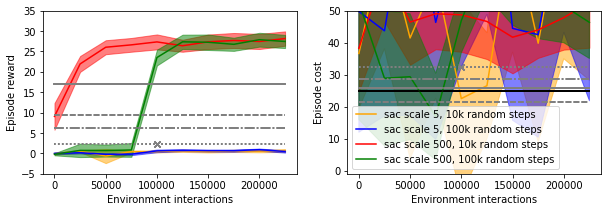

In [6]:
plot(["sac_a02_ss10k","sac_a02_ss100k","sac_a0002_ss10k","sac_a0002_ss100k"],legend=["sac scale 5, 10k random steps","sac scale 5, 100k random steps","sac scale 500, 10k random steps","sac scale 500, 100k random steps"],loc_legend="lower left")
plt.show()

#small SAC-alpha is better. Also, fewer exploration steps?

19.06018202724745
59.68
18.694732671260294
53.92
19.436337549056095
50.64
19.01154333605747
50.84


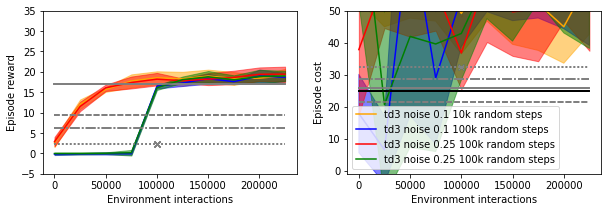

In [245]:
plot(["td3_an01_ss10k","td3_an01_ss100k","td3_an025_ss10k","td3_an025_ss100k"],legend=["td3 noise 0.1 10k random steps","td3 noise 0.1 100k random steps","td3 noise 0.25 100k random steps","td3 noise 0.25 100k random steps"])

plt.show()


#Less exploration steps seems to be better

27.945895535079813
52.56
27.950825562576775
55.4


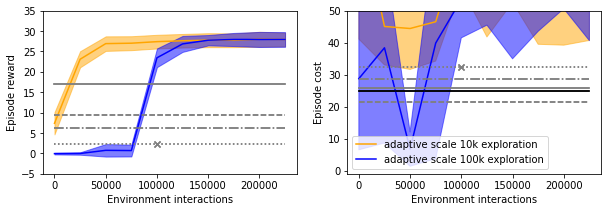

In [246]:
plot(["sac_c_ss10k","sac_c_ss100k"],legend=["adaptive scale 10k exploration","adaptive scale 100k exploration"])
plt.show()
#Performance very similar to good alphas without any tuning. => Robust?!
#Again fewer exploration steps seem to be better. 

34.87530532543697
57.12
0.7659213367085544
27.24
24.738418501745276
170.92


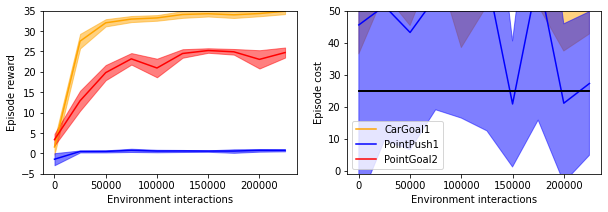

In [247]:
plot(["sac_c_ss10k_cargoal","sac_c_ss10k_pointpush","sac_c_ss10k_pointgoal2"])

plt.legend(["CarGoal1","PointPush1","PointGoal2"])
plt.show()
#Performance very similar to good alphas without any tuning. => Robust?!
#Again fewer exploration steps seem to be better. 

27.945895535079813
52.56
12.844824583751834
44.0
14.635156307308348
36.16
7.975508501097538
32.56
4.226092126004631
20.68


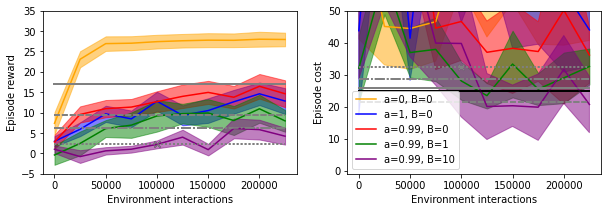

In [248]:
plot(["sac_c_ss10k","sac_c_ss10k_m0","sac_c_ss10k_m001","sac_c_ss10k_m001_a1","sac_c_ss10k_m001_a10"],["a=0, B=0","a=1, B=0","a=0.99, B=0","a=0.99, B=1","a=0.99, B=10"])

plt.show()

#High beta seem to be worst wrt to reward but better regarding costs

19.06018202724745
59.68
16.24252549833541
105.28
7.141729658062901
40.24
10.88574450683837
18.4
-0.6684318487287044
7.92


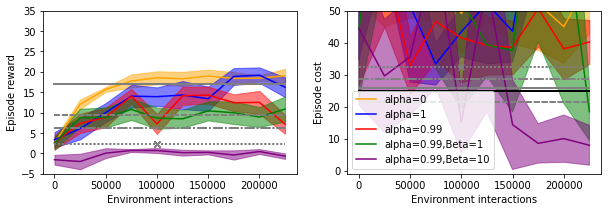

In [249]:
plot(["td3_an01_ss10k","td3_ss10k_m0","td3_ss10k_m001","td3_ss10k_m001_a1","td3_ss10k_m001_a10"],legend=["alpha=0","alpha=1","alpha=0.99","alpha=0.99,Beta=1","alpha=0.99,Beta=10"])

plt.show()
#Costs very chaotic, rewards not so stable. Beta = 10 without costs, but also no rewards. 

0.8769325046392344
94.48
3.367171758805623
38.72
-0.2814536702496233
18.2
0.9184155882399533
12.12


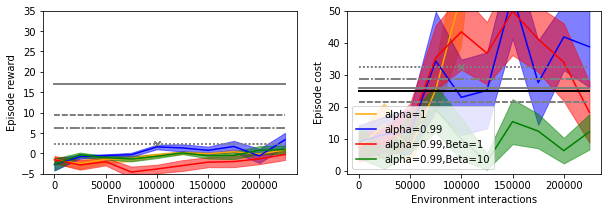

In [250]:
plot(["ppo_m0","ppo_m001","ppo_m001_a1","ppo_m001_a10"],legend=["alpha=1","alpha=0.99","alpha=0.99,Beta=1","alpha=0.99,Beta=10"])

plt.show()
#Costs ok for large beta. But rewards are pretty small all along

[0.33533766 0.69258539 3.29034633 4.63307376 6.4847105  2.70566334
 4.87089952 6.38598093 7.053651   7.46138785]
[86.08 77.6  75.96 67.72 75.4  87.88 52.12 36.52 48.52 22.56]
7.461387852186733
22.56
[-5.64467321  1.07802139  2.62234241  4.96187989  2.96222294  2.92132271
  2.9911479   4.04160098  3.4526209   4.67885544]
[41.48 61.72 40.52 44.56 17.32 35.16 16.36 18.6  11.8  25.12]
4.678855436024196
25.12
[ 0.43077149 -1.03733185 -1.02350391 -0.20739836  1.08489421  0.10353693
 -0.29329094 -0.47477869 -0.74436887 -0.62868674]
[39.72 47.2  20.12 16.08 10.   21.72  6.8  10.08 10.28  5.  ]
-0.6286867373282141
5.0


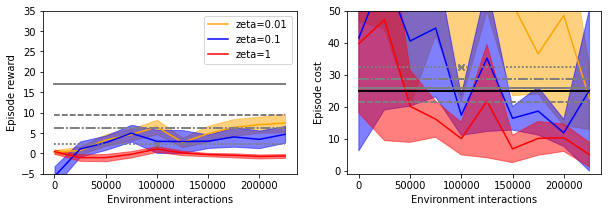

[ 2.59166068  9.6799957  10.78282271 10.99078569  8.84263464 10.12463651
 10.80490289  9.809702   10.77148229  6.98292003 11.00808576 10.14311831
 13.27871966 11.54801083 10.62432072  7.20417455 10.95446313 11.01367443
 10.8883588  11.21932597]
[58.48 73.84 59.2  43.84 36.24 25.2  23.16 42.24 27.8  35.24 20.8  19.56
 20.92 21.72 27.52 24.24 18.96 19.72 21.04 21.16]
11.21932597273637
21.16
[0.72264436 4.89482373 5.03988374 6.32556662 5.49123132 5.03826454
 5.05170132 5.87817483 4.04266302 2.86742642 4.4047819  6.16599413
 3.48065083 3.12056841 4.93527055 2.84260002 3.19766338 4.05071604
 4.35724354 4.61691292]
[38.84 19.2  49.92 74.84 39.36 27.68 22.76 23.36 24.96  8.24 13.52  6.88
 35.56  8.04  8.36  7.12 14.12  5.96  6.24 44.08]
4.616912919415241
44.08
[-1.87481764 -2.9127932  -0.96739564 -2.44353718 -2.19342791 -2.20429777
 -0.46409252 -2.10448229 -4.04462468 -2.22453305 -1.31934313 -1.31854433
 -0.12715339 -1.40051237 -0.56392473 -1.18817353 -0.80359516 -0.26749578
 -1.76760849 -0.9

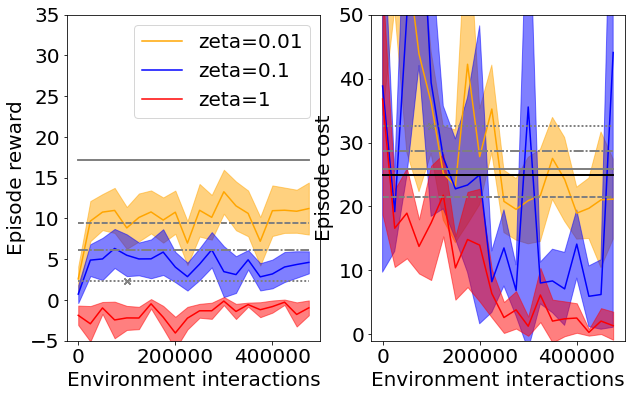

In [17]:
plot(["sac_c_ss10k_m001_a1_c001","sac_c_ss10k_m001_a1_c01","sac_c_ss10k_m001_a1_c1"],legend=["zeta=0.01","zeta=0.1","zeta=1"],loc_legend="upper right",fig_legend=1)

plt.show()

plot(["sac_c_ss10k_m001_a1_c001_long2","sac_c_ss10k_m001_a1_c01_long2","sac_c_ss10k_m001_a1_c1_long2"],legend=["zeta=0.01","zeta=0.1","zeta=1"],loc_legend="upper right",fig_legend=1,epochs=20,figsize=(10,6),fontsize=20)

plt.show()
#Agent that does not see cost is bad in terms of both reward and costs. Roughly, larger zeta means less cost and less reward. 

0.042137355110753436
96.96
1.0771723269068358
62.56
-0.030056103639621343
97.0


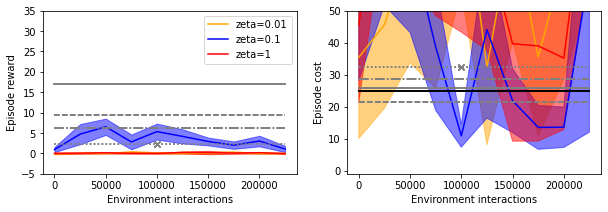

In [252]:
plot(["td3_ss10k_m001_a1_c001","td3_ss10k_m001_a1_c01","td3_ss10k_m001_a1_c1"],legend=["zeta=0.01","zeta=0.1","zeta=1"],loc_legend="upper right",fig_legend=1)

plt.show()
#Agent not seeing cost and zeta=0.1 perform best in terms of reward. Others are just chaotic. Overall this does not look like stable learning

2.5637302375494886
18.4
0.0011515747272877873
16.64
0.08545455220487447
3.88


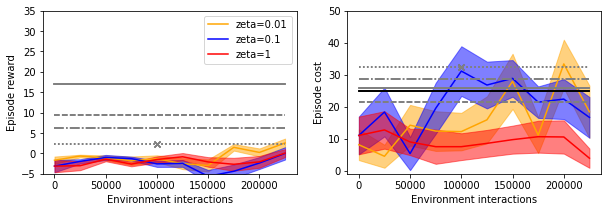

In [253]:
plot(["ppo_m001_a1_c001","ppo_m001_a1_c01","ppo_m001_a1_c1"],legend=["zeta=0.01","zeta=0.1","zeta=1"],loc_legend="upper right",fig_legend=1)

plt.show()
#Agent not seeing cost with best reward but breaking constraints. Others all seem to be rather good at respecting the constraint.
# But they learn to improve the reward very slowly. 

7.461387852186733
22.56
-0.40830507757551254
75.24
11.247733678517081
24.24
10.530043850470625
39.32
7.015737891762293
28.04


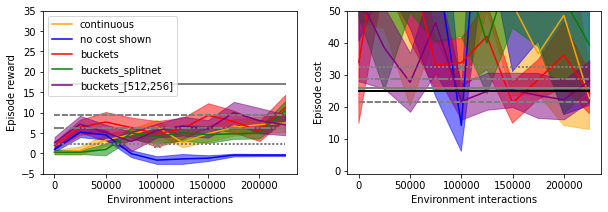

In [254]:
plot(["sac_c_ss10k_m001_a1_c001","sac_c_ss10k_m001_a1_c001_nocostinfo","sac_c_ss10k_m001_a1_c001_buckets","sac_c_ss10k_m001_a1_c001_buckets_splitnet","sac_c_ss10k_m001_a1_c001_buckets_first_layer_512"],legend=["continuous","no cost shown","buckets","buckets_splitnet","buckets_[512,256]"],fig_legend=1,loc_legend="upper left")

plt.show()

#Weak evidence, but: buckets seem to learn to respect cost more quickly and might learn a bit faster initially.

0.042137355110753436
96.96
1.9564290664162025
74.64
7.25292699972934
87.56
8.595090027175173
51.84
0.0421395540436351
96.96


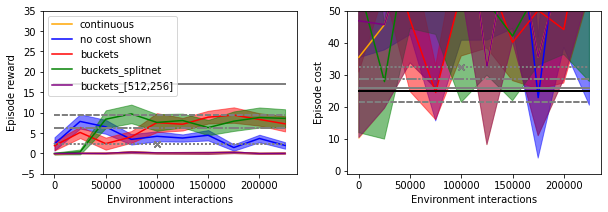

In [255]:
plot(["td3_ss10k_m001_a1_c001","td3_ss10k_m001_a1_c001_nocostinfo","td3_ss10k_m001_a1_c001_buckets","td3_ss10k_m001_a1_c001_buckets_splitnet","td3_ss10k_m001_a1_c001_buckets_first_layer_512"],legend=["continuous","no cost shown","buckets","buckets_splitnet","buckets_[512,256]"],fig_legend=1,loc_legend="upper left")

plt.show()

#Nothing seems to learn to respect the constraint. Buckets might be better in terms of reward, but this might just be random fluctuation. 

2.5637302375494886
18.4
4.961112411097046
37.28
3.2975834292455186
49.44
0.025425838898624063
35.32
0.6467788876110501
70.76


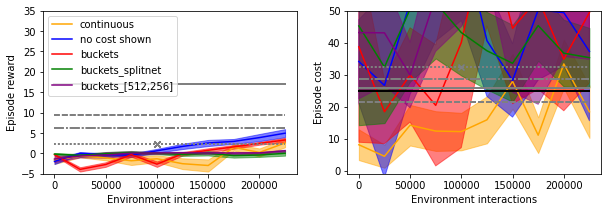

In [256]:
plot(["ppo_m001_a1_c001","ppo_m001_a1_c001_nocostinfo","ppo_m001_a1_c001_buckets","ppo_m001_a1_c001_buckets_splitnet","ppo_m001_a1_c001_buckets_first_layer_512"],legend=["continuous","no cost shown","buckets","buckets_splitnet","buckets_[512,256]"],fig_legend=1,loc_legend="upper left")

plt.show()
#Buckets seems slightly better in terms of reward, continuous might be better in terms of cost (but not super clear...)

7.461387852186733
22.56
-7.523372740628832
31.36
9.755244730069586
41.12
6.28803409247037
16.08
-1.4257243042468324
5.16


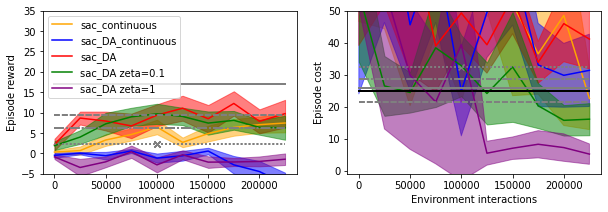

In [257]:
plot(["sac_c_ss10k_m001_a1_c001","sac_c_ss10k_m001_a1_c001_data_aug_nobuckets","sac_c_ss10k_m001_a1_c001_data_aug","sac_c_ss10k_m001_a1_c01_data_aug","sac_c_ss10k_m001_a1_c1_data_aug"],legend=["sac_continuous","sac_DA_continuous","sac_DA","sac_DA zeta=0.1","sac_DA zeta=1"],fig_legend=1,loc_legend="upper left")

plt.show()
#Data augmenations seems to learn a lot quicker intially, but we don't have strong evidence that it manages to reduce the costs...
#

7.461387852186733
22.56
7.365968905944918
11.6
3.7023290530455966
27.8
0.5210840002733462
37.0


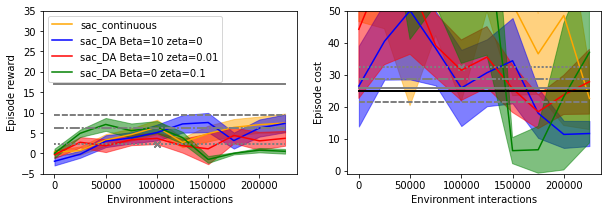

In [258]:
plot(["sac_c_ss10k_m001_a1_c001","sac_c_ss10k_m001_a10_data_aug","sac_c_ss10k_m001_a10_c001_data_aug","sac_c_ss10k_m001_a0_c01_data_aug"],["sac_continuous","sac_DA Beta=10 zeta=0","sac_DA Beta=10 zeta=0.01","sac_DA Beta=0 zeta=0.1"],fig_legend=1,loc_legend="upper left")


plt.show()

6.505074035029721
44.6
16.568623529300524
67.16
nan
nan
9.227762253839895
31.48
-0.4099426051034717
19.68


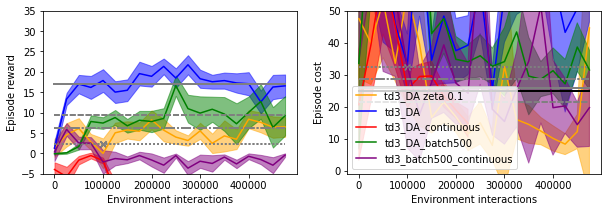

In [259]:
plot(["td3_ss10k_m001_a1_c01_long_data_aug","td3_ss10k_m001_a1_c001_long_data_aug","td3_ss10k_m001_a1_c001_data_aug_nobuckets","td3_ss10k_m001_a1_c001_long_data_aug_bigbatch","td3_ss10k_m001_a1_c001_long_bigbatch"],legend=["td3_DA zeta 0.1","td3_DA","td3_DA_continuous","td3_DA_batch500","td3_batch500_continuous"],epochs=20)
plt.show()

8.498865499848005
19.08
15.03801649679415
53.52
-0.5620921673886796
8.76
9.51174899434528
34.24


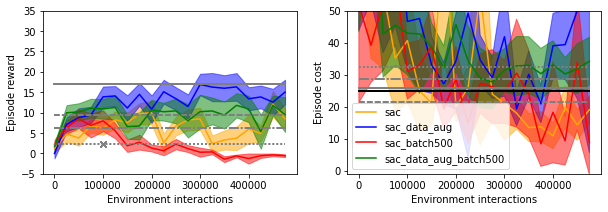

In [260]:
plot(["sac_c_ss10k_m001_a1_c001_long","sac_c_ss10k_m001_a1_c001_long_data_aug","sac_c_ss10k_m001_a1_c001_long_bigbatch_correct","sac_c_ss10k_m001_a1_c001_long_data_bigbatch"],legend=["sac","sac_data_aug","sac_batch500","sac_data_aug_batch500"],epochs=20)

plt.show()

[ 1.1573012   4.76144525  3.76520082  6.7817053   6.21334342  8.26596115
  7.57058067  9.75147789  9.99619958  2.53169312  6.6859347   8.22015108
  8.44941497  2.3817739   3.28044539  3.7200721   5.94828384  4.90134256
 12.09641879  8.4988655 ]
[113.96  71.48  56.32  35.16  40.68  25.04  21.04  77.24  20.    25.88
  55.12  23.88  21.    17.96  13.44  13.72  10.88  19.8   14.28  19.08]
8.498865499848005
19.08
[1.08564486 5.39567024 1.7474534  5.1183055  4.77091904 4.54961484
 5.58298128 3.2675066  7.3711071  3.50250437 5.07745026 3.34747384
 4.98904042 3.92753025 3.9348922  3.08253329 3.64256902 3.25834541
 2.66168069 0.995993  ]
[78.72 48.16 69.92 44.24 34.96 18.04 11.24 42.96 78.88 55.84 41.32 48.52
 21.36 13.16 31.4  32.96  7.48  7.6  15.32 12.24]
0.995992997246214
12.24
[-1.39089345e-02  7.11984503e+00  8.79694521e+00  9.42137759e+00
  1.38722914e+01  1.40980914e+01  1.11414138e+01  1.44816413e+01
  1.08517551e+01  1.51284321e+01  1.34289768e+01  1.15079676e+01
  1.69159699e+01  1.6

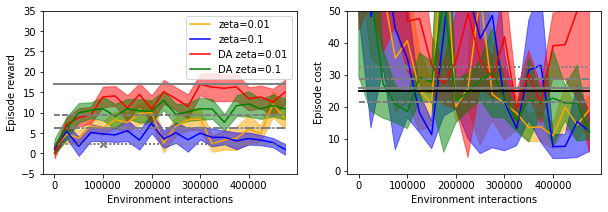

In [11]:
plot(["sac_c_ss10k_m001_a1_c001_long","sac_c_ss10k_m001_a1_c01_long","sac_c_ss10k_m001_a1_c001_long_data_aug","sac_c_ss10k_m001_a1_c01_long_data_aug"],legend=["zeta=0.01","zeta=0.1","DA zeta=0.01","DA zeta=0.1"], epochs=20,loc_legend="upper right",fig_legend=1)#,figsize=(10,6),fontsize=20)

plt.show()

25.381989760486537
45.96
17.673822141409033
77.48
5.657279887228066
26.52


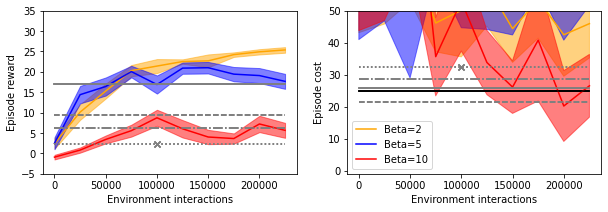

1.8911188506839545
1.16
5.197189222960423
21.24
8.498865499848005
19.08
0.995992997246214
12.24
1.3594713662800766
4.16


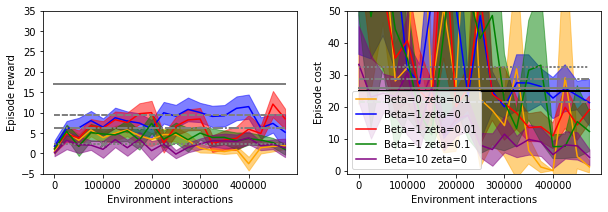

In [262]:
plot(["sac_c_ss10k_m1_a2","sac_c_ss10k_m1_a5","sac_c_ss10k_m1_a10"],legend=["Beta=2","Beta=5","Beta=10"])
plt.show()


plot(["sac_c_ss10k_m001_a0_c01_long","sac_c_ss10k_m001_a1_long","sac_c_ss10k_m001_a1_c001_long","sac_c_ss10k_m001_a1_c01_long","sac_c_ss10k_m001_a10_long"],legend=["Beta=0 zeta=0.1","Beta=1 zeta=0","Beta=1 zeta=0.01","Beta=1 zeta=0.1","Beta=10 zeta=0"],epochs=20)
plt.show()



0.34512648116841177
4.96
4.39680012699646
7.36
7.930545954249344
24.8


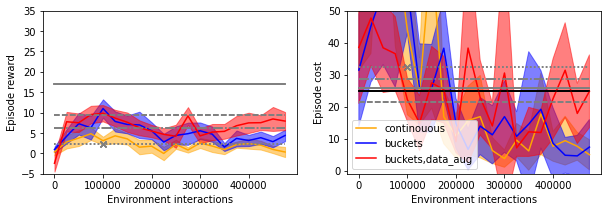

In [263]:
plot(["sac_c_ss10k_m1_a10_long","sac_c_ss10k_m1_a10_buckets_long","sac_c_ss10k_m1_a10_buckets_data_aug_long"],legend=["continouous","buckets","buckets,data_aug"],epochs=20)
plt.show()

12.772642263783801
24.12
1.9068860509770473
164.96
15.273115421794396
32.76
10.003008276611482
29.28
-0.30479660443640194
39.36


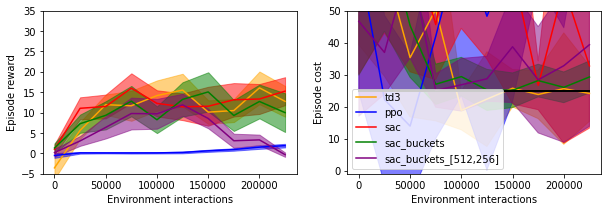

11.793995644775903
14.36
16.83681103216452
103.04
15.838510961111048
81.44
12.193824525323514
11.96
5.904205778711364
14.76


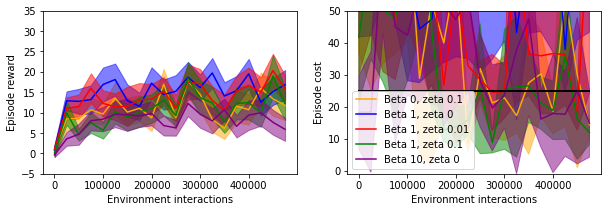

32.00030704855074
65.6
31.191531444631014
64.76
13.857032401547752
82.0


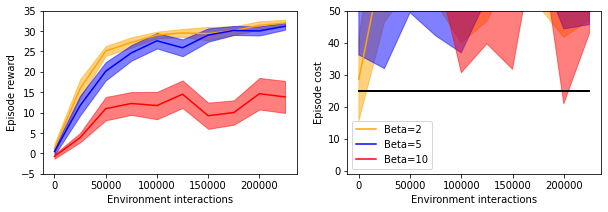

In [264]:
plot(["td3_ss10k_m001_a1_c001_cargoal","ppo_m001_a1_c001_cargoal","sac_c_ss10k_m001_a1_c001_cargoal","sac_c_ss10k_m001_a1_c001_buckets_cargoal","sac_c_ss10k_m001_a1_c001_buckets_first_layer_512_cargoal"],legend=["td3","ppo","sac","sac_buckets","sac_buckets_[512,256]"])
plt.show()

plot(["sac_c_ss10k_m001_a0_c01_cargoal","sac_c_ss10k_m001_a1_cargoal","sac_c_ss10k_m001_a1_c001_cargoal","sac_c_ss10k_m001_a1_c01_cargoal","sac_c_ss10k_m001_a10_cargoal"],epochs=20,legend=["Beta 0, zeta 0.1","Beta 1, zeta 0", "Beta 1, zeta 0.01","Beta 1, zeta 0.1","Beta 10, zeta 0"])
plt.show()


plot(["sac_c_ss10k_m1_a2_cargoal","sac_c_ss10k_m1_a5_cargoal","sac_c_ss10k_m1_a10_cargoal"],legend=["Beta=2","Beta=5","Beta=10"])
plt.show()








10.163330020432966
32.68
nan
nan
15.51107116866269
14.12


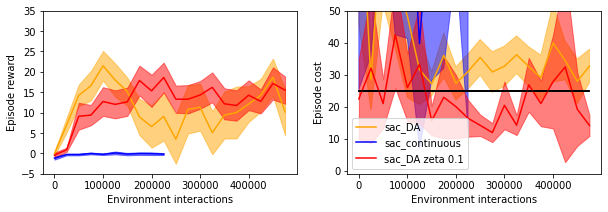

10.989446504192404
25.28
nan
nan
12.215772392685878
17.44


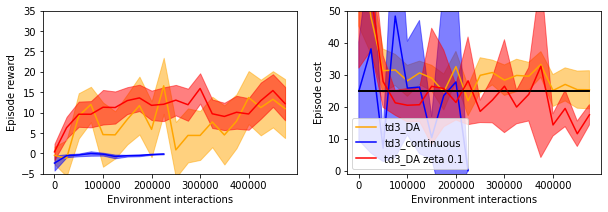

In [265]:

plot(["sac_c_ss10k_m001_a1_c001_long_data_aug_cargoal","sac_c_ss10k_m001_a1_c001_data_aug_cont_cargoal","sac_c_ss10k_m001_a1_c01_long_data_aug_cargoal"],legend=["sac_DA","sac_continuous","sac_DA zeta 0.1"],epochs=20)

plt.show()


plot(["td3_ss10k_m001_a1_c001_long_data_aug_cargoal","td3_ss10k_m001_a1_c001_data_aug_cont_cargoal","td3_ss10k_m001_a1_c01_long_data_aug_cargoal"],legend=["td3_DA","td3_continuous","td3_DA zeta 0.1"],epochs=20)
plt.show()


0.28884250051795357
43.72
0.5382568197809054
13.8
0.07195334546656962
5.68
-0.08604451567456013
4.32
-0.9731364195876919
27.68


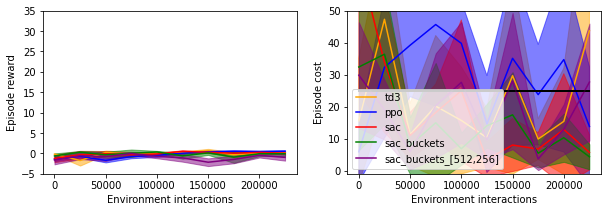

0.0037431277268225884
17.2
-0.026366022065251772
1.36
0.03191792404104854
0.64
-1.1608531410671319
0.44
0.078670306737635
0.0


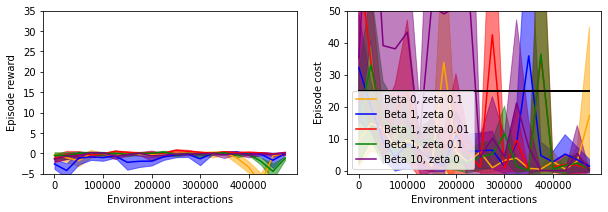

0.25719018626739065
23.64
0.4811646815232845
31.0
0.2009123361144459
2.6


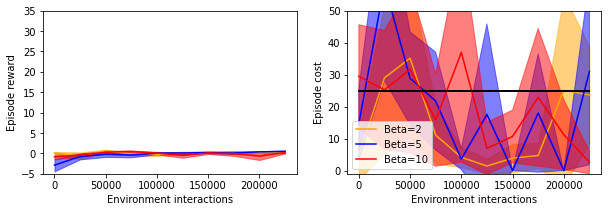

In [266]:
plot(["td3_ss10k_m001_a1_c001_pointpush","ppo_m001_a1_c001_pointpush","sac_c_ss10k_m001_a1_c001_pointpush","sac_c_ss10k_m001_a1_c001_buckets_pointpush","sac_c_ss10k_m001_a1_c001_buckets_first_layer_512_pointpush"],legend=["td3","ppo","sac","sac_buckets","sac_buckets_[512,256]"])

plt.show()

plot(["sac_c_ss10k_m001_a0_c01_pointpush","sac_c_ss10k_m001_a1_pointpush","sac_c_ss10k_m001_a1_c001_pointpush","sac_c_ss10k_m001_a1_c01_pointpush","sac_c_ss10k_m001_a10_pointpush"],legend=["Beta 0, zeta 0.1","Beta 1, zeta 0", "Beta 1, zeta 0.01","Beta 1, zeta 0.1","Beta 10, zeta 0"],epochs=20)
plt.show()

plot(["sac_c_ss10k_m1_a2_pointpush","sac_c_ss10k_m1_a5_pointpush","sac_c_ss10k_m1_a10_pointpush"],legend=["Beta=2","Beta=5","Beta=10"])
plt.show()

0.4408853761115506
3.44
nan
nan
-0.2729667439715002
3.76


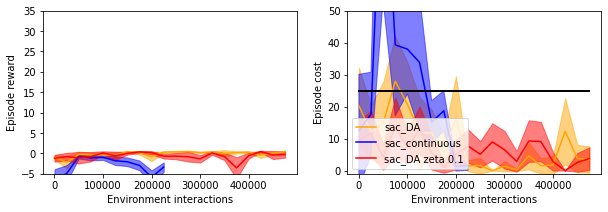

0.18567756764757193
2.68
nan
nan
0.025077726476088313
3.4


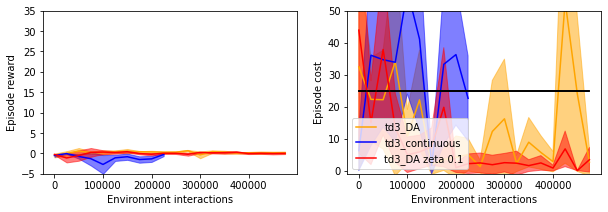

In [267]:

plot(["sac_c_ss10k_m001_a1_c001_long_data_aug_pointpush","sac_c_ss10k_m001_a1_c001_data_aug_cont_pointpush","sac_c_ss10k_m001_a1_c01_long_data_aug_pointpush"],legend=["sac_DA","sac_continuous","sac_DA zeta 0.1"],epochs=20)

plt.show()


plot(["td3_ss10k_m001_a1_c001_long_data_aug_pointpush","td3_ss10k_m001_a1_c001_data_aug_cont_pointpush","td3_ss10k_m001_a1_c01_long_data_aug_pointpush"],legend=["td3_DA","td3_continuous","td3_DA zeta 0.1"],epochs=20)
plt.show()


0.5392158200964097
26.12
1.6697092812707037
126.12
-1.7113556285920426
30.92
-2.0118485144055236
30.68
-1.9517442770718159
65.68


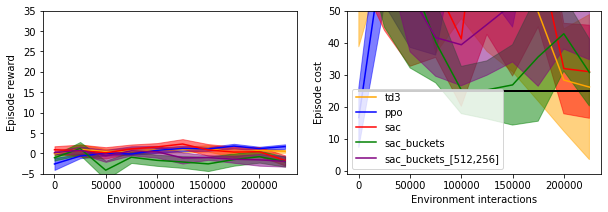

-0.12800988643361444
94.08
2.7616303835017497
86.44
0.9883486877088022
29.36
-0.144679982621964
5.32
-2.8232146911870877
12.76


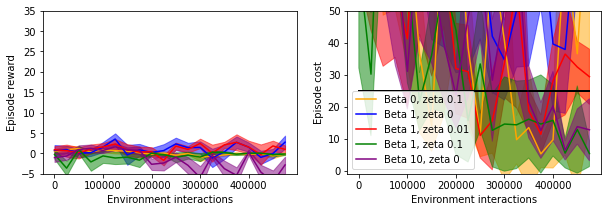

20.5612924560646
177.8
2.3826973411875194
29.44
0.1159945699409524
46.36


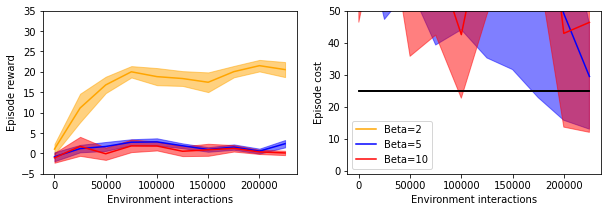

In [268]:
plot(["td3_ss10k_m001_a1_c001_pointgoal2","ppo_m001_a1_c001_pointgoal2","sac_c_ss10k_m001_a1_c001_pointgoal2","sac_c_ss10k_m001_a1_c001_buckets_pointgoal2","sac_c_ss10k_m001_a1_c001_buckets_first_layer_512_pointgoal2"],legend=["td3","ppo","sac","sac_buckets","sac_buckets_[512,256]"])

plt.show()

plot(["sac_c_ss10k_m001_a0_c01_pointgoal2","sac_c_ss10k_m001_a1_pointgoal2","sac_c_ss10k_m001_a1_c001_pointgoal2","sac_c_ss10k_m001_a1_c01_pointgoal2","sac_c_ss10k_m001_a10_pointgoal2"],legend=["Beta 0, zeta 0.1","Beta 1, zeta 0", "Beta 1, zeta 0.01","Beta 1, zeta 0.1","Beta 10, zeta 0"],epochs=20)
plt.show()

plot(["sac_c_ss10k_m1_a2_pointgoal2","sac_c_ss10k_m1_a5_pointgoal2","sac_c_ss10k_m1_a10_pointgoal2"],legend=["Beta=2","Beta=5","Beta=10"])
plt.show()


3.51655138426751
62.2
nan
nan
0.16761499209019817
8.88


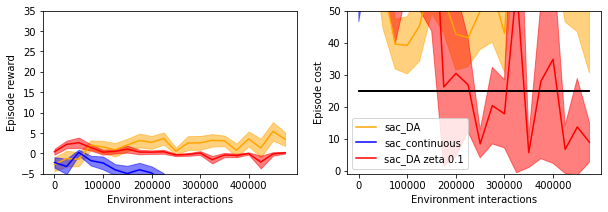

-6.062055580821732
51.08
nan
nan
-0.22112932461473
0.68


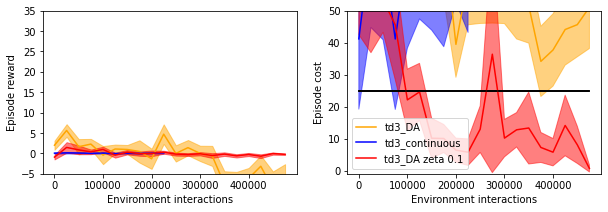

In [269]:

plot(["sac_c_ss10k_m001_a1_c001_long_data_aug_pointgoal2","sac_c_ss10k_m001_a1_c001_data_aug_cont_pointgoal2","sac_c_ss10k_m001_a1_c01_long_data_aug_pointgoal2"],legend=["sac_DA","sac_continuous","sac_DA zeta 0.1"],epochs=20)

plt.show()


plot(["td3_ss10k_m001_a1_c001_long_data_aug_pointgoal2","td3_ss10k_m001_a1_c001_data_aug_cont_pointgoal2","td3_ss10k_m001_a1_c01_long_data_aug_pointgoal2"],legend=["td3_DA","td3_continuous","td3_DA zeta 0.1"],epochs=20)
plt.show()


[ 5.18630036  7.83378373  7.81323434  9.42835233 11.25775144  8.7420428
 10.42795526  9.54354785  9.60706872 10.61260774 11.31206258 12.28657187
 12.16951994 15.49495769 12.54033994 14.05675547 14.13072405 14.16913814
 13.60275086 13.44697288 14.31585793 14.9908417  13.19986391 15.02813785
 13.15700848 14.18884673 11.69341381 11.32648882 12.84049361 11.926971
 11.20375264  9.76724954 11.65369891 12.52891566 11.78388527 11.79863125
 13.14953381 13.74538934 11.05558212 12.81505768 12.61613691 10.15882753
 11.0965684  11.60898958 12.04269493 10.83676605 11.64751112  9.96697592
 12.44436007 12.96425694 11.50544181 10.74271452 11.48869472 10.22588117
 11.7984496  13.68088337 10.58012073  9.65150915 10.07710538 10.87145283
 11.76318472 11.72204443 11.36697228 10.21546833 11.66631207 11.38181773
 10.36026403 11.88018209 11.4275732  12.09428337 12.98429819 10.69136388
 12.64233729 11.44840231 12.05743261 15.40002485 13.13575538 14.42704773
 13.27990773 14.16386401 12.15712316 10.16374235 10.01

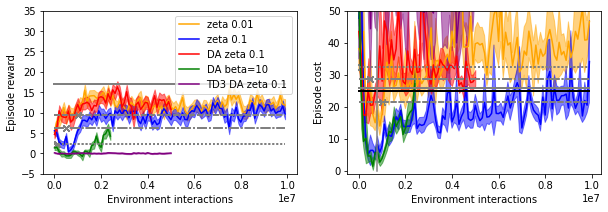

In [4]:
plot(["sac_c_ss10k_m001_a1_c001_10M","sac_c_ss10k_m001_a1_c01_10M","sac_c_ss10k_m001_a1_c01_data_aug_5M","sac_c_ss10k_m001_a10_data_aug_2_5M","td3_ss10k_m001_a1_c01_data_aug_5M"],epochs=400,legend=["zeta 0.01","zeta 0.1","DA zeta 0.1","DA beta=10","TD3 DA zeta 0.1"],stretch=4,fig_legend=1,loc_legend="upper right")
plt.plot([800000,800000],[0,50],"grey")
plt.show()


In [271]:
print()